In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df_copy=df

In [6]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df_copy['Glucose']=df_copy['Glucose'].replace(0,df['Glucose'].mean())
df_copy['BloodPressure']=df_copy['BloodPressure'].replace(0,df['BloodPressure'].mean())
df_copy['SkinThickness']=df_copy['SkinThickness'].replace(0,df['SkinThickness'].mean())
df_copy['Insulin']=df_copy['Insulin'].replace(0,df['Insulin'].mean())
df_copy['BMI']=df_copy['BMI'].replace(0,df['BMI'].mean())

In [8]:
df_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

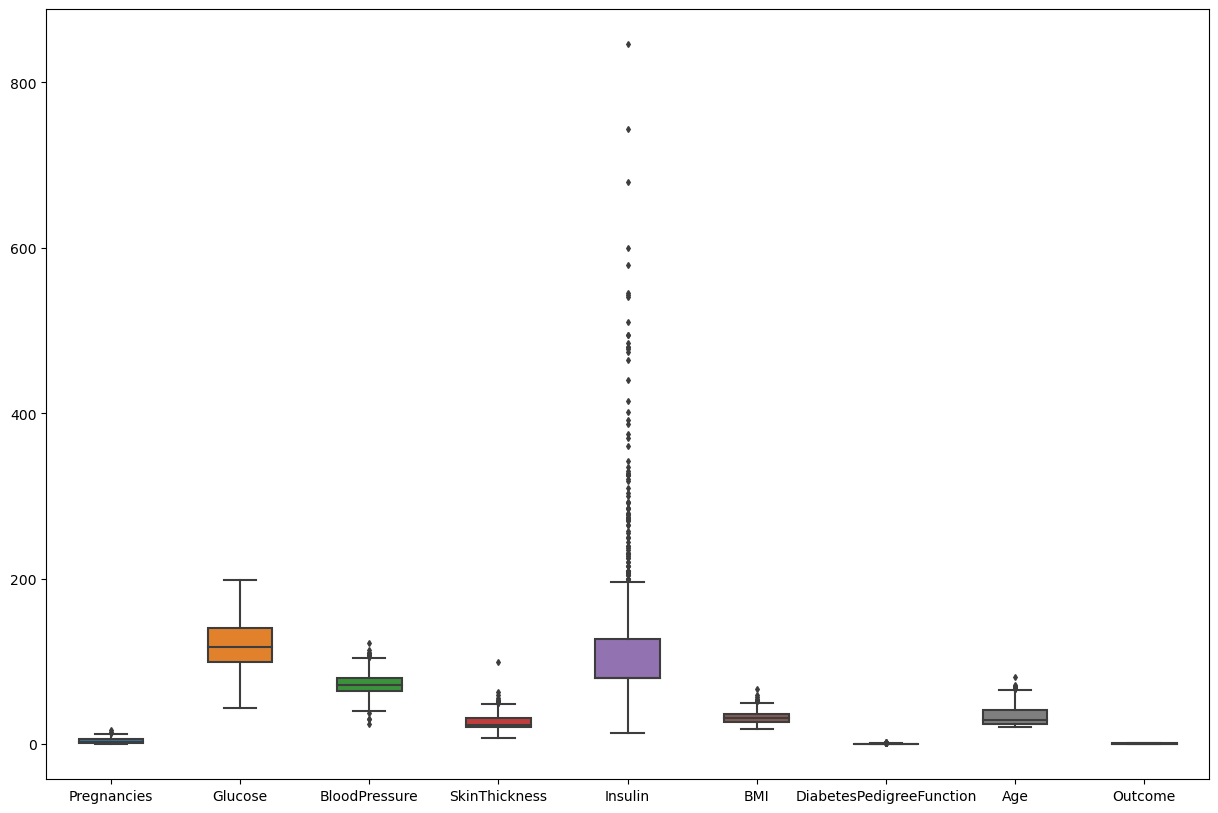

In [9]:
fix,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df_copy,width=0.5, ax=ax, fliersize=3)

In [18]:
minimum,Q1,Q2,Q3,maximum=np.quantile(df_copy['Insulin'],[0,0.25,0.50,0.75,1])

In [19]:
print(minimum)
print(Q1)
print(Q2)
print(Q3)
print(maximum)

14.0
79.79947916666667
79.79947916666667
127.25
846.0


In [20]:
IQR=Q3-Q1
print(IQR)

47.45052083333333


In [21]:
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

In [22]:
lower_threshold,upper_threshold

(8.623697916666671, 198.42578125)

In [23]:
outliers=[]
for i in df_copy['Insulin']:
    if i>=lower_threshold and i<=upper_threshold:
        pass
    else:
        outliers.append(i)
outliers

[543.0,
 846.0,
 230.0,
 235.0,
 245.0,
 207.0,
 240.0,
 300.0,
 342.0,
 304.0,
 270.0,
 228.0,
 220.0,
 495.0,
 225.0,
 325.0,
 284.0,
 204.0,
 485.0,
 285.0,
 495.0,
 210.0,
 318.0,
 280.0,
 271.0,
 478.0,
 744.0,
 370.0,
 680.0,
 402.0,
 258.0,
 375.0,
 278.0,
 545.0,
 220.0,
 360.0,
 215.0,
 205.0,
 231.0,
 255.0,
 249.0,
 325.0,
 293.0,
 465.0,
 325.0,
 285.0,
 415.0,
 275.0,
 579.0,
 310.0,
 474.0,
 210.0,
 277.0,
 210.0,
 237.0,
 328.0,
 250.0,
 480.0,
 265.0,
 210.0,
 326.0,
 210.0,
 215.0,
 225.0,
 207.0,
 215.0,
 274.0,
 330.0,
 600.0,
 230.0,
 293.0,
 272.0,
 321.0,
 440.0,
 540.0,
 200.0,
 231.0,
 240.0,
 265.0,
 205.0,
 480.0,
 200.0,
 335.0,
 387.0,
 291.0,
 392.0,
 200.0,
 200.0,
 510.0]

In [28]:
cleaned_df = df_copy[(df_copy['Insulin'] >= lower_threshold) & (df_copy['Insulin'] <= upper_threshold)]

In [30]:
cleaned_df.reset_index(drop=True, inplace=True)

<Axes: >

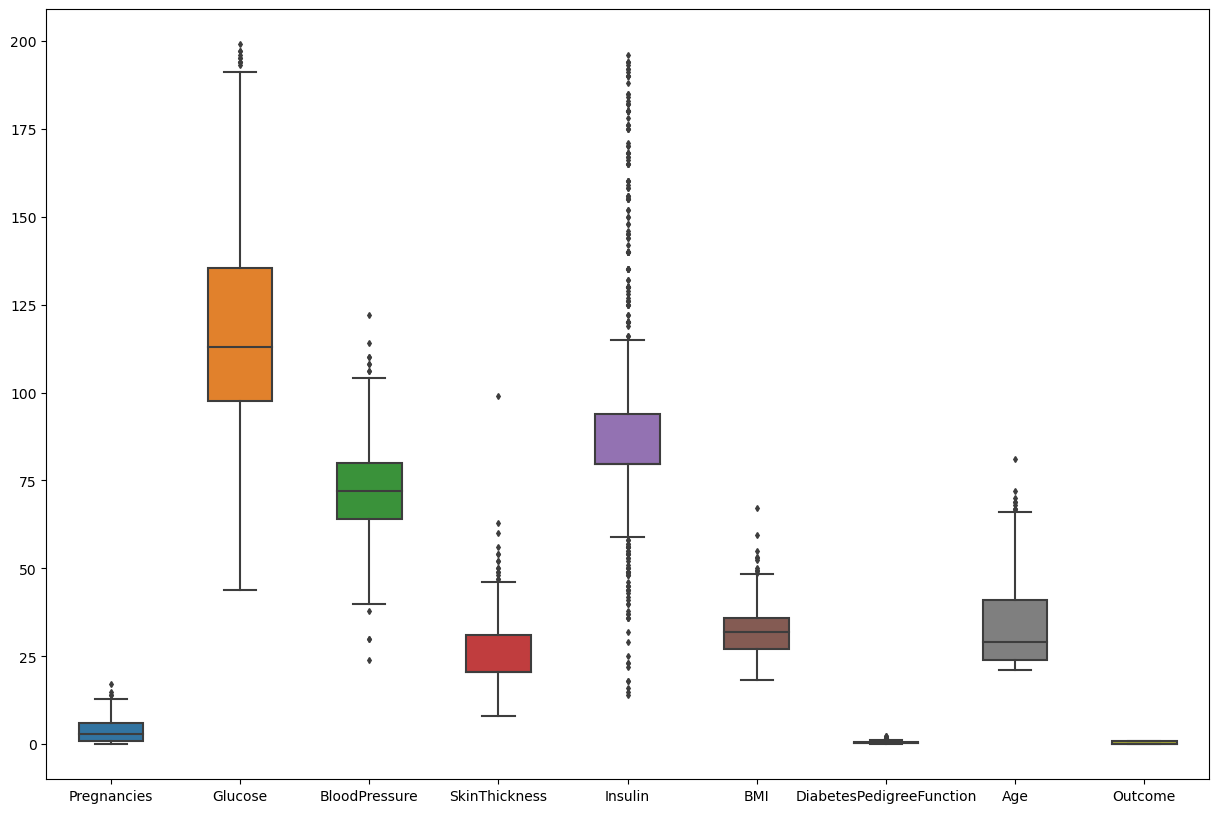

In [31]:
fix,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=cleaned_df,width=0.5, ax=ax, fliersize=3)

In [32]:
cleaned_df.shape

(679, 9)

In [33]:
df.shape,df_copy.shape

((768, 9), (768, 9))

In [34]:
cleaned_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [35]:
X=cleaned_df.iloc[:,:-1]
y=cleaned_df.iloc[:,-1]

In [36]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [37]:
y

0      1
1      0
2      1
3      0
4      1
      ..
674    0
675    0
676    0
677    1
678    0
Name: Outcome, Length: 679, dtype: int64

In [38]:
X.shape,y.shape

((679, 8), (679,))

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [40]:
X

array([[ 6.30083501e-01,  1.03245481e+00,  3.75217258e-05, ...,
         2.43136454e-01,  5.35481111e-01,  1.43074671e+00],
       [-8.46199097e-01, -1.14397786e+00, -4.95317652e-01, ...,
        -7.95740425e-01, -3.31994400e-01, -1.86112374e-01],
       [ 1.22059654e+00,  2.24158407e+00, -6.60436044e-01, ...,
        -1.28549667e+00,  6.76917335e-01, -1.01014528e-01],
       ...,
       [ 3.34826981e-01,  9.96979527e-02,  3.75217258e-05, ...,
        -8.55104818e-01, -6.65155285e-01, -2.71210221e-01],
       [-8.46199097e-01,  2.72430704e-01, -9.90672826e-01, ...,
        -2.76301985e-01, -3.38280455e-01,  1.17545317e+00],
       [-8.46199097e-01, -8.67605455e-01, -1.65080870e-01, ...,
        -2.31778690e-01, -4.45143380e-01, -8.66895147e-01]])

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [42]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((454, 8), (454,), (225, 8), (225,))

In [43]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
y_pred=clf.predict(X_test)

In [45]:
y_pred.shape

(225,)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
score=classification_report(y_test,y_pred)
print(score)

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       153
           1       0.55      0.57      0.56        72

    accuracy                           0.71       225
   macro avg       0.67      0.67      0.67       225
weighted avg       0.71      0.71      0.71       225



In [48]:
confusion_matrix(y_test,y_pred)

array([[119,  34],
       [ 31,  41]], dtype=int64)

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.3276143790849677

[Text(0.4130527210884354, 0.9615384615384616, 'x[1] <= 0.186\ngini = 0.441\nsamples = 454\nvalue = [305, 149]'),
 Text(0.179421768707483, 0.8846153846153846, 'x[7] <= -0.399\ngini = 0.275\nsamples = 286\nvalue = [239, 47]'),
 Text(0.09608843537414966, 0.8076923076923077, 'x[5] <= 2.544\ngini = 0.132\nsamples = 169\nvalue = [157, 12]'),
 Text(0.0824829931972789, 0.7307692307692307, 'x[5] <= -0.083\ngini = 0.113\nsamples = 167\nvalue = [157, 10]'),
 Text(0.027210884353741496, 0.6538461538461539, 'x[6] <= 0.677\ngini = 0.02\nsamples = 97\nvalue = [96, 1]'),
 Text(0.013605442176870748, 0.5769230769230769, 'gini = 0.0\nsamples = 85\nvalue = [85, 0]'),
 Text(0.04081632653061224, 0.5769230769230769, 'x[5] <= -1.248\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.027210884353741496, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05442176870748299, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.1377551020408163, 0.6538461538461539, 'x[6] <= 2.561\ngini = 0.224\nsam

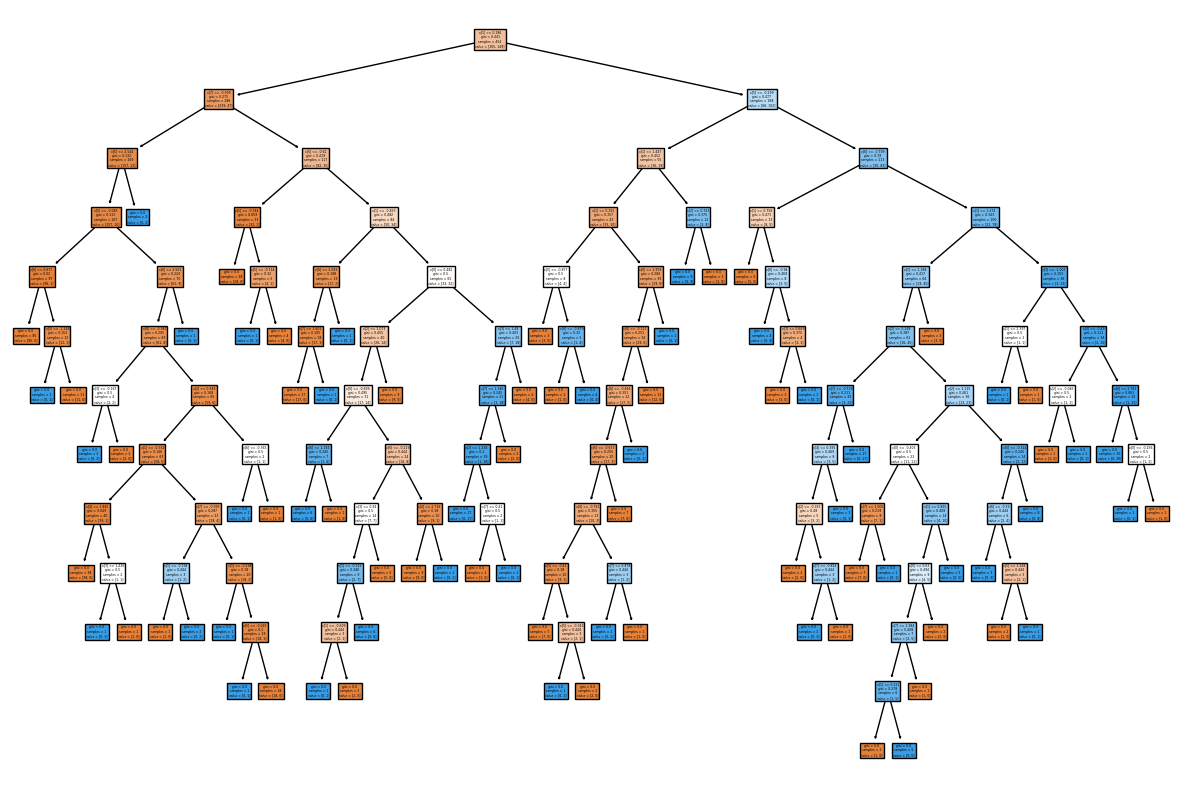

In [50]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [51]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [52]:
from sklearn.model_selection import GridSearchCV


In [53]:
Decisionclf=DecisionTreeClassifier()

In [54]:
Decisionclfcv=GridSearchCV(Decisionclf,param_grid=parameter,cv=5,scoring='accuracy')

In [55]:
Decisionclfcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [56]:
Decisionclfcv.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'log2',
 'splitter': 'random'}

In [57]:
Decisionclf=DecisionTreeClassifier(criterion='entropy',max_depth=2,max_features='log2',splitter='random')

In [58]:
Decisionclf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='log2',
                       splitter='random')

In [59]:
y_pred=Decisionclf.predict(X_test)

In [60]:
r2_score(y_test,y_pred)

-0.6952614379084971